<a href="https://colab.research.google.com/github/ethanlin1126/Data_Mining/blob/main/113_2%E8%B3%87%E6%96%99%E6%8E%A2%E5%8B%98%E4%BD%9C%E6%A5%AD%E4%B8%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

縣立古寧國小

https://docs.google.com/spreadsheets/d/1ZQ5e1zTfPYR7oPpTXjtWRGP724Mfy3M_hKkCPQridf8/edit?usp=sharing

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1ZQ5e1zTfPYR7oPpTXjtWRGP724Mfy3M_hKkCPQridf8/edit?usp=sharing')

In [ ]:
# 從 gsheets 的 All-whiteboard-device 載入 sheets
sheets = gsheets.worksheet('學生').get_all_values()
# 將 sheets1 資料載入 pd 的 DataFrame 進行分析
df = pd.DataFrame(sheets[1:], columns=sheets[0])
# 取得最前面的5筆資料
df.head()

,年級,班級,座號,姓名,登入次數,使用總時數,被指派任務總數,任務完成總數,被指派任務完成率,被指派測驗總數,測驗任務完成總數,被指派測驗完成率,被指派影片總數,測驗影片完成總數,被指派影片完成率,被指派閱讀總數,測驗閱讀完成總數,被指派閱讀完成率
0,6,六年一班,1,李宥松,0,00：00：00,0,0,0,0,0,0,0,0,0,0,0,0
1,6,六年一班,3,吳鎏熠,1,00：56：18,0,0,0,0,0,0,0,0,0,0,0,0
2,6,六年一班,4,莊博宇,1,00：55：56,0,0,0,0,0,0,0,0,0,0,0,0
3,6,六年一班,5,許駿彬,1,00：43：46,0,0,0,0,0,0,0,0,0,0,0,0
4,6,六年一班,6,李承縉,0,00：00：00,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.dtypes

,0
年級,object
班級,object
座號,object
姓名,object
登入次數,object
使用總時數,object
被指派任務總數,object
任務完成總數,object
被指派任務完成率,object
被指派測驗總數,object


In [ ]:
type(df['登入次數'][0])

str

In [ ]:
df['年級'] = df['年級'].astype(int)
df['登入次數'] = df['登入次數'].astype(int)
df['被指派任務總數'] = df['被指派任務總數'].astype(int)
df['任務完成總數'] = df['任務完成總數'].astype(int)
df['被指派任務完成率'] = df['被指派任務完成率'].astype(float)
df['被指派測驗總數'] = df['被指派測驗總數'].astype(int)
df['測驗任務完成總數'] = df['測驗任務完成總數'].astype(int)
df['被指派測驗完成率'] = df['被指派測驗完成率'].astype(int)
df['被指派影片總數'] = df['被指派影片總數'].astype(int)
df['測驗影片完成總數'] = df['測驗影片完成總數'].astype(int)
df['被指派影片完成率'] = df['被指派影片完成率'].astype(int)
df['被指派閱讀總數'] = df['被指派閱讀總數'].astype(int)
df['測驗閱讀完成總數'] = df['測驗閱讀完成總數'].astype(int)
df['被指派閱讀完成率'] = df['被指派閱讀完成率'].astype(int)

In [ ]:
df['使用總時數'] = df['使用總時數'].str.replace('：', ':', regex=False)  # 轉換全形冒號
df['使用總時數'] = pd.to_timedelta(df['使用總時數']).dt.total_seconds().astype(int)  # 轉換為秒數

In [ ]:
df.head()

,年級,班級,座號,姓名,登入次數,使用總時數,被指派任務總數,任務完成總數,被指派任務完成率,被指派測驗總數,測驗任務完成總數,被指派測驗完成率,被指派影片總數,測驗影片完成總數,被指派影片完成率,被指派閱讀總數,測驗閱讀完成總數,被指派閱讀完成率
0,6,六年一班,1,李宥松,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0
1,6,六年一班,3,吳鎏熠,1,3378,0,0,0.0,0,0,0,0,0,0,0,0,0
2,6,六年一班,4,莊博宇,1,3356,0,0,0.0,0,0,0,0,0,0,0,0,0
3,6,六年一班,5,許駿彬,1,2626,0,0,0.0,0,0,0,0,0,0,0,0,0
4,6,六年一班,6,李承縉,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0


In [ ]:
df.dtypes

,0
年級,int64
班級,object
座號,object
姓名,object
登入次數,int64
使用總時數,int64
被指派任務總數,int64
任務完成總數,int64
被指派任務完成率,float64
被指派測驗總數,int64


In [ ]:
df = df[~df['年級'].isin([2, 6])]  # 刪除年級為 2 和 6 的行
df = df.reset_index(drop=True)  # 重置索引，從 0 開始
df.index += 1  # 讓索引從 1 開始
df.head()

,年級,班級,座號,姓名,登入次數,使用總時數,被指派任務總數,任務完成總數,被指派任務完成率,被指派測驗總數,測驗任務完成總數,被指派測驗完成率,被指派影片總數,測驗影片完成總數,被指派影片完成率,被指派閱讀總數,測驗閱讀完成總數,被指派閱讀完成率
1,3,三年一班,1,李濬哲,21,71577,41,39,0.95,32,0,0,0,0,0,9,9,1
2,3,三年一班,2,李宇威,17,64023,42,40,0.95,33,0,0,0,0,0,9,9,1
3,3,三年一班,3,余冠廷,10,188769,20,19,0.95,11,0,0,0,0,0,9,9,1
4,3,三年一班,4,李毓麒,25,125577,38,36,0.95,29,0,0,0,0,0,9,9,1
5,3,三年一班,5,李洪愷,11,497434,20,19,0.95,11,0,0,0,0,0,9,9,1


In [ ]:
df = df.rename(columns={
    '年級': 'Grade',
    '班級': 'Class',
    '座號': 'Seat_Number',
    '姓名': 'Name',
    '登入次數': 'Login_Count',
    '使用總時數': 'Total_Usage_Time',
    '被指派任務總數': 'Assigned_Task_Count',
    '任務完成總數': 'Completed_Task_Count',
    '被指派任務完成率': 'Task_Completion_Rate',
    '被指派測驗總數': 'Assigned_Quiz_Count',
    '測驗任務完成總數': 'Completed_Quiz_Count',
    '被指派測驗完成率': 'Quiz_Completion_Rate',
    '被指派影片總數': 'Assigned_Video_Count',
    '測驗影片完成總數': 'Completed_Video_Count',
    '被指派影片完成率': 'Video_Completion_Rate',
    '被指派閱讀總數': 'Assigned_Reading_Count',
    '測驗閱讀完成總數': 'Completed_Reading_Count',
    '被指派閱讀完成率': 'Reading_Completion_Rate'
})
df.head()

,Grade,Class,Seat_Number,Name,Login_Count,Total_Usage_Time,Assigned_Task_Count,Completed_Task_Count,Task_Completion_Rate,Assigned_Quiz_Count,Completed_Quiz_Count,Quiz_Completion_Rate,Assigned_Video_Count,Completed_Video_Count,Video_Completion_Rate,Assigned_Reading_Count,Completed_Reading_Count,Reading_Completion_Rate
1,3,三年一班,1,李濬哲,21,71577,41,39,0.95,32,0,0,0,0,0,9,9,1
2,3,三年一班,2,李宇威,17,64023,42,40,0.95,33,0,0,0,0,0,9,9,1
3,3,三年一班,3,余冠廷,10,188769,20,19,0.95,11,0,0,0,0,0,9,9,1
4,3,三年一班,4,李毓麒,25,125577,38,36,0.95,29,0,0,0,0,0,9,9,1
5,3,三年一班,5,李洪愷,11,497434,20,19,0.95,11,0,0,0,0,0,9,9,1


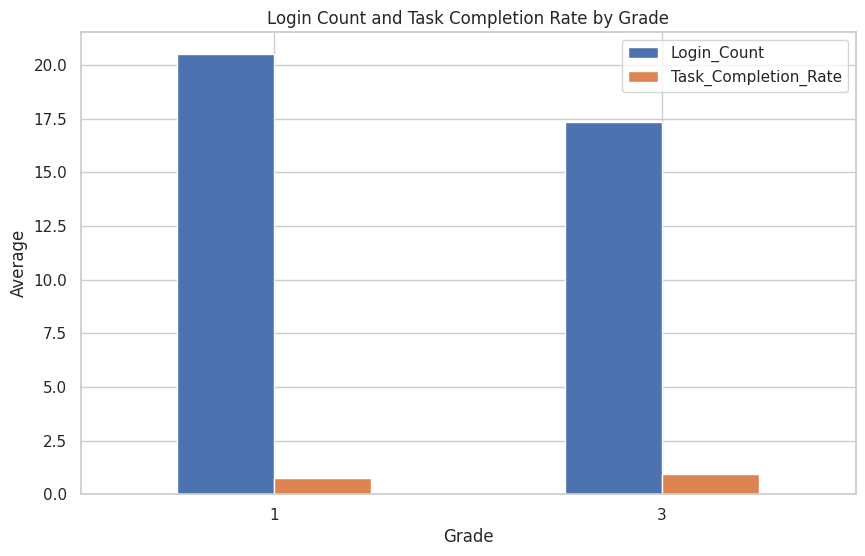

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 分組顯示登入次數、任務完成率等指標
df_avg = df.groupby('Grade')[['Login_Count', 'Task_Completion_Rate']].mean()

# 繪製柱狀圖
df_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Login Count and Task Completion Rate by Grade')
plt.ylabel('Average')
plt.xlabel('Grade')
plt.xticks(rotation=0)  # 讓x軸的標籤不傾斜
plt.show()


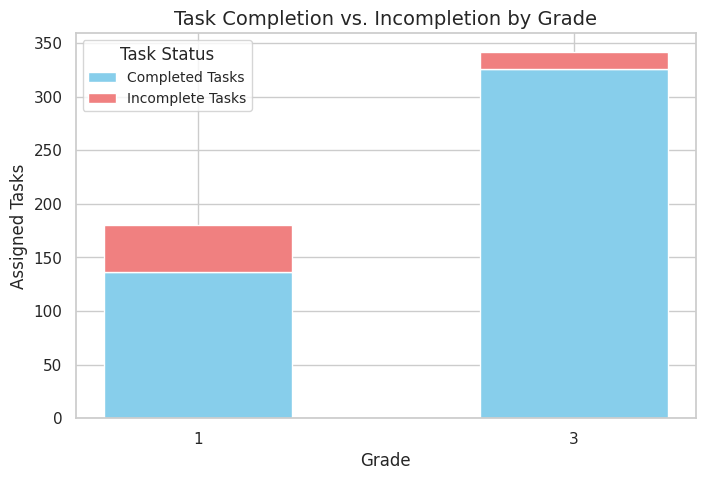

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假設你的 DataFrame 已經有了這些資料
df['Incomplete_Task_Count'] = df['Assigned_Task_Count'] - df['Completed_Task_Count']

# 計算每個年級的被指派任務總數、完成的任務數與未完成的任務數
df_avg = df.groupby('Grade')[['Assigned_Task_Count', 'Completed_Task_Count', 'Incomplete_Task_Count']].sum()

# 設定柱狀圖的參數
bar_width = 0.5  # 柱子寬度
x = np.arange(len(df_avg.index))  # X 軸位置

# 建立圖表
plt.figure(figsize=(8, 5))

# 堆疊柱狀圖
plt.bar(x, df_avg['Completed_Task_Count'], width=bar_width, label='Completed Tasks', color='skyblue')
plt.bar(x, df_avg['Incomplete_Task_Count'], width=bar_width, bottom=df_avg['Completed_Task_Count'], label='Incomplete Tasks', color='lightcoral')

# 設定 X 軸與標籤
plt.xticks(x, df_avg.index, ha='center')  # 設定 X 軸為年級並使標籤居中
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Assigned Tasks", fontsize=12)
plt.title("Task Completion vs. Incompletion by Grade", fontsize=14)
plt.legend(title="Task Status", fontsize=10)

# 顯示圖表
plt.show()


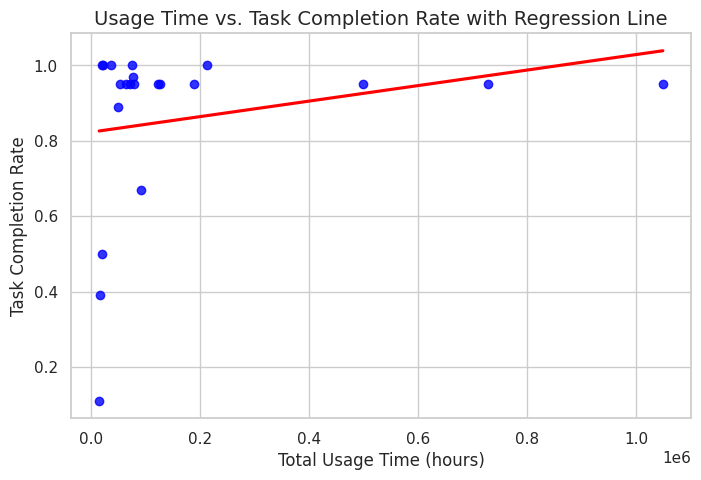

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假設你的資料已經存在於 df 中，並且包含 'Total_Usage_Time' 和 'Task_Completion_Rate' 這兩個欄位

plt.figure(figsize=(8, 5))

# 使用 regplot 繪製散點圖和回歸線
sns.regplot(data=df, x='Total_Usage_Time', y='Task_Completion_Rate', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'},ci=None)

# 設定標籤和標題
plt.xlabel('Total Usage Time (hours)', fontsize=12)
plt.ylabel('Task Completion Rate', fontsize=12)
plt.title('Usage Time vs. Task Completion Rate with Regression Line', fontsize=14)

# 顯示圖表
plt.show()


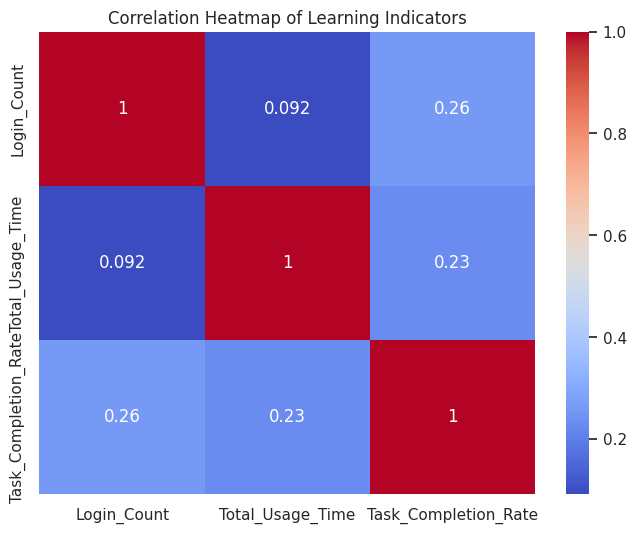

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 計算相關性矩陣
correlation_matrix = df[['Login_Count', 'Total_Usage_Time', 'Task_Completion_Rate']].corr()

# 繪製熱力圖
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Learning Indicators')
plt.show()
